# Simulation Test

In [1]:
from code.Parameters import *
from code.Simulator import Simulator
from code.Utility import Utility
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# SIMULATION 
simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
     n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib, visual = True)


Average Genome Length: 9747913.75 
Initial Genome Length: 8000000


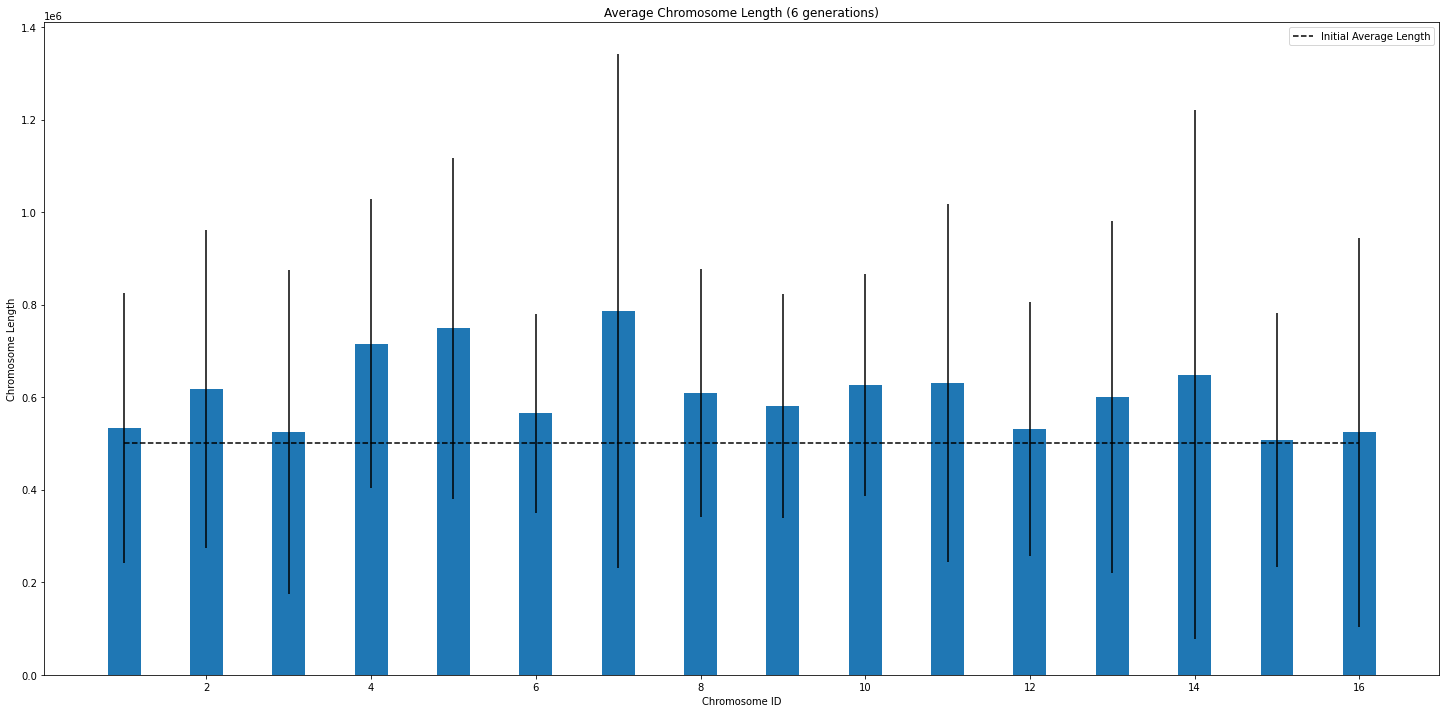

In [3]:
# AVERAGES
initial_genome_len = sum([len(seq) for id, seq in chromosome_table])
initial_ave_len = initial_genome_len / len(chromosome_table)
print("\nAverage Genome Length:", simul.average_genome_length, "\nInitial Genome Length:", initial_genome_len)

# BOX PLOT
fig, ax = plt.subplots(figsize = (25,12))
plt.bar(range(1, len(chromosome_table) + 1), simul.average_chromosome_length, \
    yerr = simul.chr_length_st_dev, width = 0.4)
    
ax.plot([1., len(chromosome_table)], [initial_ave_len, initial_ave_len], "k--", label = "Initial Average Length")
plt.xlabel("Chromosome ID")
plt.ylabel("Chromosome Length")
plt.title(f"Average Chromosome Length ({number_of_generations} generations)")
plt.legend()
plt.show()

# Visualization Test

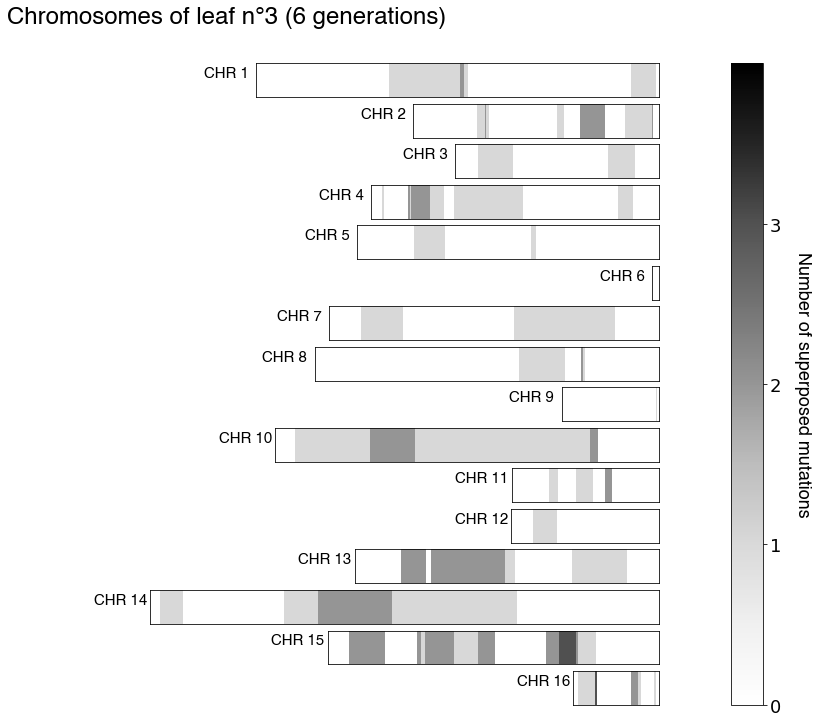

In [20]:
n_leaf = 3
simul.chromosome_visualizator(n_leaf)
